Computation Problem Set 3

Sophie Sun

Note: I got a lot of help from Natasha! 

In [1]:
# import packages
import numpy as np
from scipy import optimize as opt
import matplotlib.pyplot as plt
import time

In [2]:
# variables using calibration from section 2.6
α = 0.35
δ = 0.6415
β = 0.442
σ = 3
A = 1
nvec = np.array([1.0, 1.0, 0.2])

In [3]:
# functions used in exercises
# function that calculates u
def u(c): 
    return (c ** (1 - σ) - 1) / (1 - σ)
# function that calculates u'
def u1(c):
    return c ** (-σ)
# function that calculates w
def w(α, A, K, L):
    return (1 - α) * A * (K / L) ** α 
# function that calculates r
def r(α, A, L, K, δ): 
    return α * A * (L / K) ** (1 - α) - δ

In [4]:
# PROBLEM 2.1
# function feasible
def feasible(f_params, bvec_guess):
    nvec, A, α, δ = f_params
    K, L = np.sum(bvec_guess), np.sum(nvec)
    # initialize cnstr
    b_cnstr, c_cnstr, K_cnstr = np.zeros(2, dtype=bool), np.zeros(3, dtype=bool), np.zeros(1, dtype=bool)
    # calculate w* and r*
    w_rate = w(α, A, K, L)
    r_rate = r(α, A, L, K, δ)
    # find c at each period
    c1 = nvec[0] * w_rate - bvec_guess[0]
    c2 = nvec[1] * w_rate + (1 + r_rate) * bvec_guess[0] - bvec_guess[1]
    c3 = nvec[2] * w_rate + (1 + r_rate) * bvec_guess[1]
    # for any c[s] <= 0, set to true
    c_cnstr = np.array([c1, c2, c3]) <= 0
    print(c_cnstr)
    # set elements equal to True according to conditions
    if K <= 0:
        K_cnstr[0] = True
    if c_cnstr[0] == True:
        b_cnstr[0] = True
    if c_cnstr[1] == True:
        b_cnstr[:] = True
    if c_cnstr[2] == True:
        b_cnstr[1] = True
    return b_cnstr, c_cnstr, K_cnstr

In [5]:
# PART A
f_params = nvec, A, α, δ
bvec_guess = np.array([1.0, 1.2])
feasible(f_params, bvec_guess)

[ True False False]


(array([ True, False]), array([ True, False, False]), array([False]))

The budget constraint at time period 1 is violated.

In [6]:
# PART B
bvec_guess = np.array([0.06, -0.001])
feasible(f_params, bvec_guess)

[False False False]


(array([False, False]), array([False, False, False]), array([False]))

None of the constraints are violated.

In [7]:
# PART C
bvec_guess = np.array([0.1, 0.1])
feasible(f_params, bvec_guess)

[False False False]


(array([False, False]), array([False, False, False]), array([False]))

None of the constraints are violated.

In [8]:
# PROBLEM 2.2
SS_tol = 1e-5
def get_SS(bvec, args, SS_graphs = False):
    start = time.clock()
    # variables
    nvec, β, σ, A, α, δ, SS_tol = args
    n1, n2, n3 = nvec
    L = np.sum(nvec)
    # function that returns the paths of periods 1 and 2
    def paths(bvec):
        b2, b3 = bvec
        K = np.sum(bvec)
        w_rate = w(α, A, K, L)
        r_rate = r(α, A, L, K, δ)
        p1 = u1(n1 * w_rate - b2) - β * (1 + r_rate) * u1(n2 * w_rate + (1 + r_rate) * b2 - b3)
        p2 = u1(n2 * w_rate + (1 + r_rate) * b2 - b3) - β * (1 + r_rate) * u1((1 + r_rate) * b3 + n3 * w_rate)
        return p1, p2
    # solve for steady states
    b_ss = opt.root(paths, x0 = bvec, tol = SS_tol).x
    K_ss = np.sum(b_ss)        
    w_ss = w(α, A, K_ss, L)  
    r_ss = r(α, A, L, K_ss, δ)
    # consumption
    c_1 = n1 * w_ss - b_ss[0]
    c_2 = n2 * w_ss + (1 + r_ss) * b_ss[0] - b_ss[1]
    c_3 = n3 * w_ss + (1 + r_ss) * b_ss[1]
    c_ss = np.array([c_1, c_2, c_3])
    C_ss = c_ss.sum()      
    # output
    Y_ss = C_ss + (b_ss[1] - (1 - δ) * b_ss[0]).sum()
    # Euler error
    EulErr_ss = β * (1 + r_ss) * u1(c_ss[1:]) - u1(c_ss[:-1])
    # resource error
    RCerr_ss = Y_ss - C_ss - δ * K_ss
    # graph
    if SS_graphs == True:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        axes[0].bar(range(2, 4), b_ss)
        axes[0].set(xticks=([2, 3]), xlabel='State', title='Steady state $b_t$')
        axes[1].bar(range(1, 4), c_ss)
        axes[1].set(xticks=([1, 2, 3]), xlabel='State', title='Steady state $c_t$')
        plt.tight_layout()
        plt.show()
    # time
    ss_time = time.clock() - start
    # return values
    ss_output = {
        'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss, 
        'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss, 
        'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss, 
        'ss_time': ss_time}
    return ss_output

In [9]:
# PART A
args = (nvec, β, σ, A, α, δ, SS_tol)
ss = get_SS(bvec_guess, args)

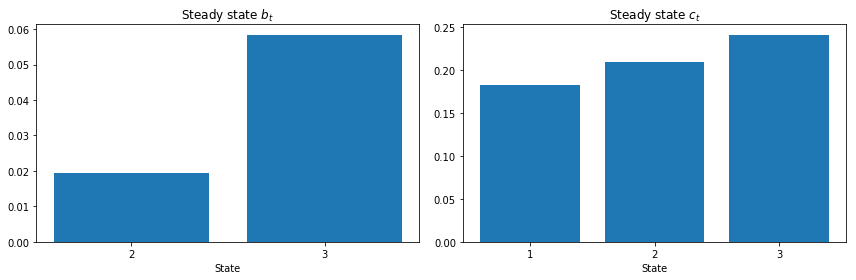

{'C_ss': 0.6329006782167177,
 'EulErr_ss': array([ 4.50781670e-06, -8.92472291e-06]),
 'K_ss': 0.0777236279220895,
 'RCerr_ss': 0.0016278487132806718,
 'Y_ss': 0.6843882342420188,
 'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'r_ss': 2.433062283358659,
 'ss_time': 0.5634190000000001,
 'w_ss': 0.20172465936076353}

In [10]:
# PART B
get_SS(bvec_guess, args, True)

In [11]:
# PART C
β = 0.55
args = (nvec, β, σ, A, α, δ, SS_tol)
get_SS(bvec_guess, args)

{'C_ss': 0.691284290244305,
 'EulErr_ss': array([6.82726977e-08, 2.51137209e-08]),
 'K_ss': 0.10504237016721853,
 'RCerr_ss': -0.0006206546125954587,
 'Y_ss': 0.7580483160939803,
 'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'r_ss': 1.8863765066381661,
 'ss_time': 0.0005639999999997869,
 'w_ss': 0.2241521958905792}

If $\beta$ increases, the steady state consumption, capital, output, and wage values increase, while the steady state interest rate decreases. This is because a higher discount factor means that in the future, consumption of goods is worth less (in present value) than that of today. So, consumption increases today.

In [12]:
# PROBLEM 2.3

In [13]:
# set parameters
T = 20
δ = 0.6415
σ = 3
A = 1
α = 0.35
nvec = np.array([1, 1, 0.2])
n1, n2, n3 = nvec
L = np.sum(nvec)
# steady states
bbar2, bbar3 = ss['b_ss']
Kbar = ss['K_ss']
b21, b31 = 0.8 * bbar2, 1.1 * bbar3
K1 = b21 + b31

In [14]:
# functions for euler equations
def euler_b2(w1, w2, r2, b2, b3, β):
    u1(n1 * w1 - b2) - β * (1 + r2) * u1(n2 * w2 + (1 + r2) * b2 - b3)
def euler_b3(w2, w3, r2, r3, b2, b3, β):
    u1(n2 * w2 + (1 + r2) * b2 - b3) - β * (1 + r3) * u1((1 + r3) * b3 + n3 * w3)

In [15]:
# function that calculates b2t2 and b3t3
def b2t2_b3t3(bvec, w1, w2, w3, r2, r3, β):
    b2t2, b3t3 = bvec
    e1 = euler_b2(w1, w2, r2, b2t2, b3t3, β)
    e2 = euler_b3(w2, w3, r2, r3, b2t2, b3t3, β)
    return np.array([e1, e2]).flatten()

In [24]:
# function that updates bmat
def update_bmat(b21, b31, K, bmat, T, m, β):
    w_rate = w(α, A, K, L)
    r_rate = r(α, A, L, K, δ)
    euler_errors = np.ones((T + m, 2))
    for i in range(1, T + m - 2):
        w1, w2, w3 = w_rate[i - 1], w_rate[i], w_rate[i + 1]
        r2, r3 = r_rate[i], r_rate[i + 1]
        sol = opt.root(b2t2_b3t3, np.zeros(2), args = (w1, w2, w3, r2, r3, β))
        b2t2, b3t3 = sol.x
        euler_errors[i - 1, :] = sol.fun
        bmat[i, 0] = b2t2
        bmat[i + 1, 1] = b3t3
    return bmat, euler_errors

In [25]:
# function that calculates b32
def find_b32(b32, b21, w1, w2, r1, r2, β):
    return euler_b3(w1, w2, r1, r2, b21, b32, β)

In [28]:
# function that calculates the ss path
def ss_path(b21, b31, T, β = 0.442, ξ = 0.2, ɛ = 1e-9, max_iter = 100):
    start = time.clock()
    m = 5
    dist = 1e3
    i = 0
    K = np.linspace(K1, Kbar, T + m)
    bmat = np.zeros((T + m, 2))
    bmat[0, :] = b21, b31
    # Solve for the b32
    w_rate = w(α, A, K, L)
    r_rate = r(α, A, L, K, δ)
    bmat[1, 1] = opt.root(find_b32, b31, args = (b21, w_rate[0], w_rate[1], r_rate[0], r_rate[1], β)).x
    while (i < max_iter) and (dist > ɛ):        
        bmat, e = update_bmat(b21, b31, K, bmat, T, m, β)
        K_prime = bmat.sum(axis=1)
        dist = ((K_prime - K)**2).sum()
        K = ξ * K_prime + (1 - ξ) * K
        i += 1
    ss_time = time.clock() - start
    if dist < ɛ:
        print(f'Converged in {i} iterations')
    else:
        print('Did not converge') 
    K_path = K
    b2_path = bmat[:, 0]
    b3_path = bmat[:, 1]
    euler_errors = e[:-m]
    print(f'The maximum Euler error is {euler_errors.max()}')
    w_path = w(α, A, K_path, L)
    r_path = r(α, A, L, K_path, δ)
    c_1_path = n1 * w_path - b2_path
    c_2_path = n2 * w_path + (1 + r_path) * b2_path - b3_path
    c_3_path = n3 * w_path + (1 + r_path) * b3_path
    c_path = np.array([c_1_path, c_2_path, c_3_path])
    C_path = c_path.sum(axis=0)
    I_path = K_path[1:] - (1 - δ) * K_path[:-1]
    Y_path = C_path[:-1] + I_path
    RCerr_bar = Y_path - C_path[:-1] - δ * I_path
    print(f'The maximum resource constraint error is {RCerr_bar[:-m].max()}')
    return K_path[:-m], w_path[:-m], r_path[:-m]

In [29]:
# PART A
path = ss_path(b21, b31, 20)

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

error: Result from function call is not a proper array of floats.

NameError: name 'path' is not defined

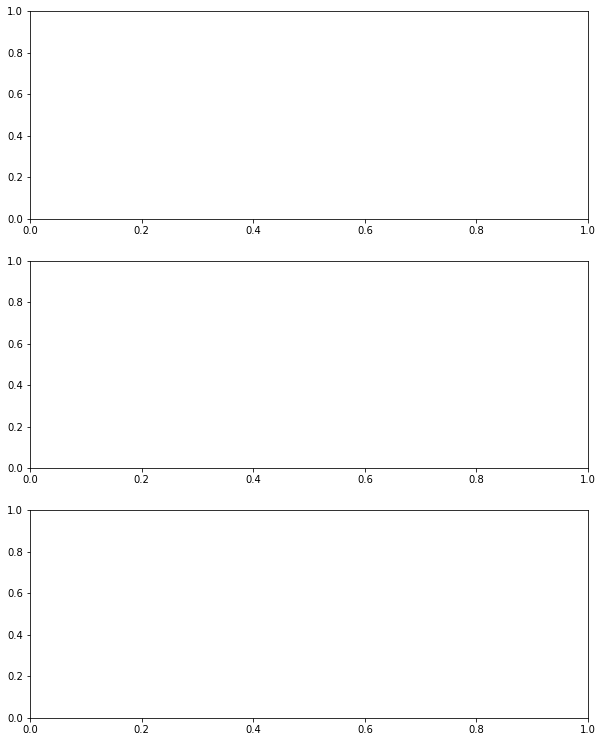

In [30]:
# PART B
# plot
fig, axes = plt.subplots(3, 1, figsize=(10, 13))
titles = ['Equilibrium time path of $K_t$',
          'Equilibrium time path of $w_t$',
          'Equilibrium time path of $r_t$']

for i in range(3):

    axes[i].plot(path[i])
    axes[i].set_title(titles[i])
    axes[i].grid()
    
plt.show()

In [ ]:
# PART C
np.argwhere((path[0] - Kbar) < 0.00001) + 1

It took the economy 2 periods to get within 0.00001 of the steady-state capital stock K. After period 4, the aggregate capital stock is never again farther than 0.00001 away from the steady-state.